In [1]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

## EDA for BOA APP Reviews

In [3]:
# Import necessary modules and packages
from scripts.utils import AppName
from scripts.sentiment_analysis import SentimentAnalysis, SentimentMethod
import pandas as pd

In [4]:
# load the review data
review_data = pd.read_csv('../Data/cleaned/boa_reviews_cleaned.csv')

#show the first few rows of the review data
review_data.head(5)

,review,rating,date,bank,source
0,it's not working,3,2025-06-05,boa,Google Play Store
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,boa,Google Play Store
2,exceptional,5,2025-06-03,boa,Google Play Store
3,BoA Mobile good bank,5,2025-06-02,boa,Google Play Store
4,this is worest app 24/7 loading,1,2025-06-01,boa,Google Play Store


In [5]:
# create an instance of the SentimentAnalysis class
analysis = SentimentAnalysis(review_data, AppName.BOA)

Checking for NLTK resources...
NLTK resources not found. Downloading...
NLTK resources downloaded.


Device set to use cpu


In [6]:
# Preprocess review text
analysis.preprocess_reviews()
review_data.head(5)

Preprocessing reviews...
Reviews preprocessed. Tokens extracted.


,review,rating,date,bank,source,processed_review
0,it's not working,3,2025-06-05,boa,Google Play Store,working
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,boa,Google Play Store,hello facing problem boa mobile app every time...
2,exceptional,5,2025-06-03,boa,Google Play Store,exceptional
3,BoA Mobile good bank,5,2025-06-02,boa,Google Play Store,boa mobile good bank
4,this is worest app 24/7 loading,1,2025-06-01,boa,Google Play Store,worest app loading


In [8]:
# Sentiment analysis using Bert
analysis.compute_sentiment(method=SentimentMethod.BERT)
review_data.head(5)

Computing DistilBERT sentiment scores...
DistilBERT sentiment scores computed.
Sentiment results saved to ..\Data\gold\boa_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score
0,it's not working,3,2025-06-05,boa,Google Play Store,working,positive,0.998782
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,boa,Google Play Store,hello facing problem boa mobile app every time...,negative,0.998130
2,exceptional,5,2025-06-03,boa,Google Play Store,exceptional,positive,0.999851
3,BoA Mobile good bank,5,2025-06-02,boa,Google Play Store,boa mobile good bank,positive,0.998473
4,this is worest app 24/7 loading,1,2025-06-01,boa,Google Play Store,worest app loading,negative,0.991218


In [9]:
# Sentiment analysis using VADER
analysis.compute_sentiment(method=SentimentMethod.VADER)
review_data.head(5)

Computing VADER sentiment scores...
VADER sentiment scores computed.
Sentiment results saved to ..\Data\gold\boa_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment
0,it's not working,3,2025-06-05,boa,Google Play Store,working,positive,0.998782,0.0000,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,boa,Google Play Store,hello facing problem boa mobile app every time...,negative,0.998130,-0.7401,negative
2,exceptional,5,2025-06-03,boa,Google Play Store,exceptional,positive,0.999851,0.0000,neutral
3,BoA Mobile good bank,5,2025-06-02,boa,Google Play Store,boa mobile good bank,positive,0.998473,0.4404,positive
4,this is worest app 24/7 loading,1,2025-06-01,boa,Google Play Store,worest app loading,negative,0.991218,0.0000,neutral


In [10]:
# Sentiment analysis using Text Blob

analysis.compute_sentiment(method=SentimentMethod.TEXT_BLOB)
review_data.head(5)

Computing TextBlob sentiment scores...
TextBlob sentiment scores computed.
Sentiment results saved to ..\Data\gold\boa_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment,textblob_score,textblob_sentiment
0,it's not working,3,2025-06-05,boa,Google Play Store,working,positive,0.998782,0.0000,neutral,0.000000,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,boa,Google Play Store,hello facing problem boa mobile app every time...,negative,0.998130,-0.7401,negative,0.033333,neutral
2,exceptional,5,2025-06-03,boa,Google Play Store,exceptional,positive,0.999851,0.0000,neutral,0.666667,positive
3,BoA Mobile good bank,5,2025-06-02,boa,Google Play Store,boa mobile good bank,positive,0.998473,0.4404,positive,0.700000,positive
4,this is worest app 24/7 loading,1,2025-06-01,boa,Google Play Store,worest app loading,negative,0.991218,0.0000,neutral,0.000000,neutral


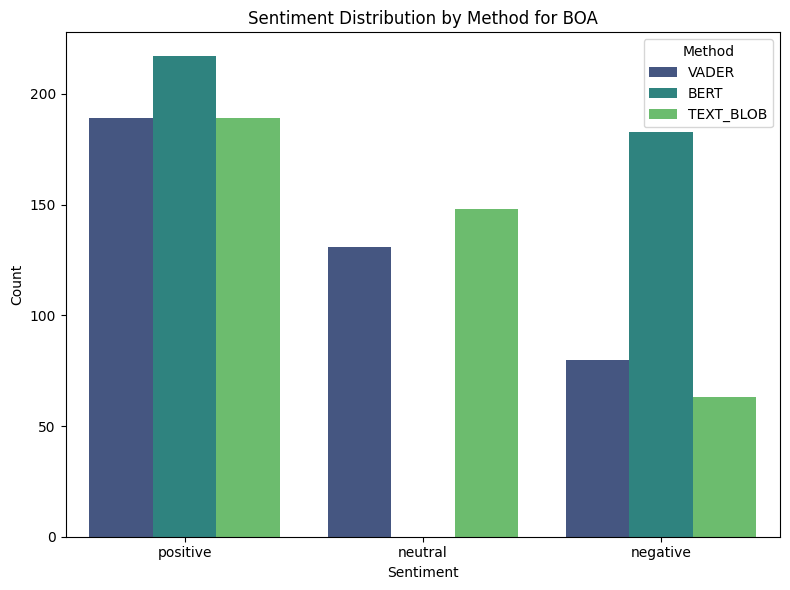

In [11]:
# Visualize sentiment distribution for all sentiment algorithms
analysis.plot_sentiment_distribution()

Top 20 keywords in positive reviews (bert):
[('app', 38), ('good app', 11), ('bank', 9), ('banking', 9), ('application', 8), ('this app', 7), ('transaction', 7), ('service', 6), ('phone', 4), ('money', 4), ('the app', 3), ('time', 3), ('day', 3), ('customer', 3), ('the developer option', 3), ('developer', 3), ('option', 3), ('version', 3), ('country', 3), ('excellent app', 2)]

Top 20 keywords in negative reviews (bert):
[('app', 105), ('the app', 28), ('bank', 28), ('time', 27), ('this app', 26), ('developer', 18), ('money', 14), ('option', 14), ('banking', 14), ('phone', 10), ('issue', 9), ('experience', 9), ('application', 9), ('problem', 7), ('bug', 7), ('boa', 7), ('service', 7), ('transaction', 7), ('error', 6), ('developer option', 6)]


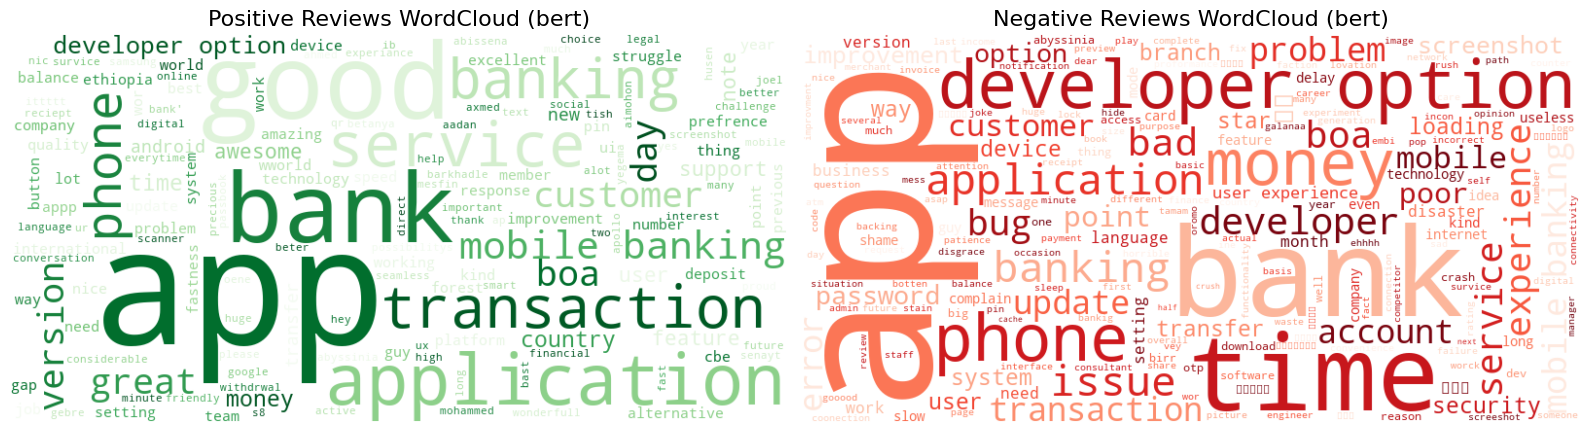

{'positive': [('app', 38),
  ('good app', 11),
  ('bank', 9),
  ('banking', 9),
  ('application', 8),
  ('this app', 7),
  ('transaction', 7),
  ('service', 6),
  ('phone', 4),
  ('money', 4),
  ('the app', 3),
  ('time', 3),
  ('day', 3),
  ('customer', 3),
  ('the developer option', 3),
  ('developer', 3),
  ('option', 3),
  ('version', 3),
  ('country', 3),
  ('excellent app', 2)],
 'negative': [('app', 105),
  ('the app', 28),
  ('bank', 28),
  ('time', 27),
  ('this app', 26),
  ('developer', 18),
  ('money', 14),
  ('option', 14),
  ('banking', 14),
  ('phone', 10),
  ('issue', 9),
  ('experience', 9),
  ('application', 9),
  ('problem', 7),
  ('bug', 7),
  ('boa', 7),
  ('service', 7),
  ('transaction', 7),
  ('error', 6),
  ('developer option', 6)]}

In [12]:
## Extract Keywords from positive and negative reviews
analysis.keyword_extraction(top_n=20, method=SentimentMethod.BERT)

In [13]:
# Extract themes from the reviews using BERT
analysis.extract_themes(method=SentimentMethod.BERT)


Top 30 keywords in positive reviews (bert):
[('app', 38), ('good app', 11), ('bank', 9), ('banking', 9), ('application', 8), ('this app', 7), ('transaction', 7), ('service', 6), ('phone', 4), ('money', 4), ('the app', 3), ('time', 3), ('day', 3), ('customer', 3), ('the developer option', 3), ('developer', 3), ('option', 3), ('version', 3), ('country', 3), ('excellent app', 2), ('great boa', 2), ('transfer', 2), ('the application', 2), ('good application', 2), ('any transaction', 2), ('mobile banking', 2), ('feature', 2), ('user', 2), ('support', 2), ('great service', 2)]

Top 30 keywords in negative reviews (bert):
[('app', 105), ('the app', 28), ('bank', 28), ('time', 27), ('this app', 26), ('developer', 18), ('money', 14), ('option', 14), ('banking', 14), ('phone', 10), ('issue', 9), ('experience', 9), ('application', 9), ('problem', 7), ('bug', 7), ('boa', 7), ('service', 7), ('transaction', 7), ('error', 6), ('developer option', 6), ('the bank', 6), ('user', 6), ('my account', 5), 

{'Account Access Issues': [('my account', 1), ('account', 1), ('password', 1)],
 'Transaction Performance': [('transaction', 2),
  ('transfer', 1),
  ('any transaction', 1)],
 'User Interface & Experience': [('app', 2),
  ('application', 2),
  ('this app', 2),
  ('the app', 2),
  ('good app', 1),
  ('excellent app', 1),
  ('the application', 1),
  ('good application', 1),
  ('update', 1),
  ('bad app', 1)],
 'Customer Support': [('service', 2), ('support', 1), ('great service', 1)],
 'Feature Requests': [('option', 2),
  ('the developer option', 1),
  ('feature', 1),
  ('developer option', 1)],
 'Other': [('bank', 2),
  ('banking', 2),
  ('phone', 2),
  ('money', 2),
  ('time', 2),
  ('customer', 2),
  ('developer', 2),
  ('user', 2),
  ('day', 1),
  ('version', 1),
  ('country', 1),
  ('great boa', 1),
  ('mobile banking', 1),
  ('issue', 1),
  ('experience', 1)]}

Top 60 keywords in positive reviews (bert):
[('app', 38), ('good app', 11), ('bank', 9), ('banking', 9), ('application', 8), ('this app', 7), ('transaction', 7), ('service', 6), ('phone', 4), ('money', 4), ('the app', 3), ('time', 3), ('day', 3), ('customer', 3), ('the developer option', 3), ('developer', 3), ('option', 3), ('version', 3), ('country', 3), ('excellent app', 2), ('great boa', 2), ('transfer', 2), ('the application', 2), ('good application', 2), ('any transaction', 2), ('mobile banking', 2), ('feature', 2), ('user', 2), ('support', 2), ('great service', 2), ('this bank', 2), ('the country', 2), ('the wor app', 2), ('awesome', 2), ('some note', 2), ('note', 2), ('boa mobile good bank', 1), ('android phone', 1), ('interest', 1), ('good service', 1), ('this application', 1), ('boa', 1), ('a considerable improvement', 1), ('its fastness', 1), ('a transaction', 1), ('improvement', 1), ('language', 1), ('qr', 1), ('scanner', 1), ('survice', 1), ('alot', 1), ('fastness', 1), ('n

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\scripts\sentiment_analysis.py:341: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts), y=list(sorted_themes), palette='viridis')


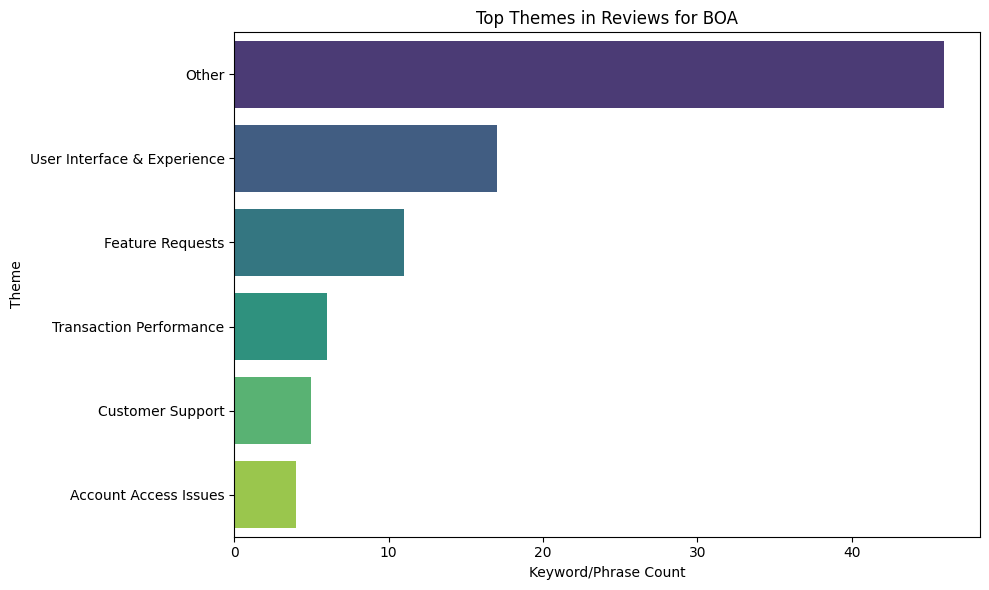

In [14]:
## Visualize the themes
analysis.plot_theme_map(top_n=30, method=SentimentMethod.BERT)